In [1]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file1 = "1 mM Lactat Influx_MCT1.csv"

df1 = pd.read_csv(file1, sep=';', decimal=',', skiprows=36, encoding='latin1')

# Ersetze "OVER" durch NaN in der gesamten DataFrame
df1 = df1.replace('OVER', np.nan)

df1.head()


,Startzeit:,14.11.2025 11:13:10,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
3,Zeit [s],0,8,16,24,32,40,48,56,64,...,528,536,544,552,560,568,576,584,592,600
4,Temp. [øC],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [3]:
Kontrolle_Lactat = dataframe1(df1, 3, 5, 6, 7)
Kontrolle_Hepes = dataframe1(df1, 3, 8, 9, 10)
MCT1 = dataframe1(df1, 3, 11, 12, 13)
Kontrolle_Lactat.head()

,Time,1.Messung,2.Messung,3.Messung,Mittelwerte,Standardabweichung
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,8.0,0.002724,-0.001726,0.014364,0.005121,0.008308
2,16.0,-0.009466,-0.011244,-0.000193,-0.006968,0.005934
3,24.0,0.009235,-0.018150,0.006459,-0.000819,0.015073
4,32.0,-0.007526,-0.020856,0.001976,-0.008802,0.011469


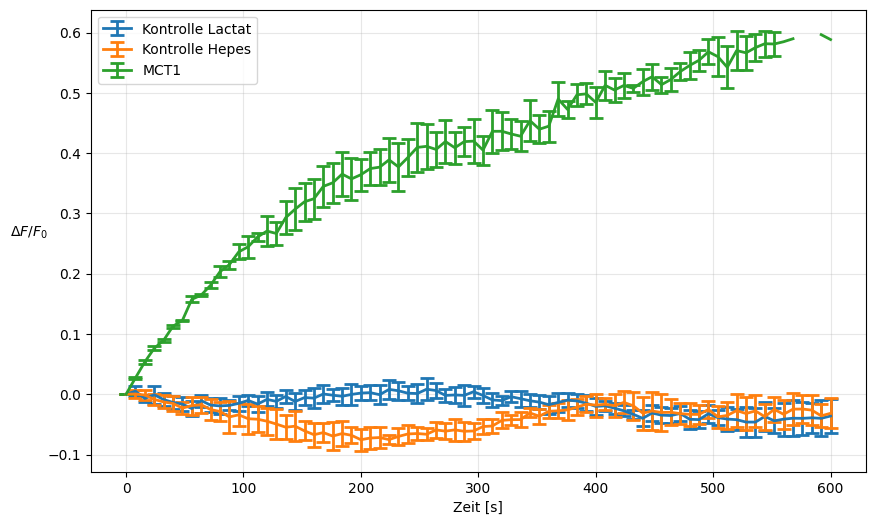

Abbildung gespeichert: ../figueres/MCT1_Influx_1mM_plot.png


In [8]:
import os
outdir = os.path.join('..', 'figueres')
os.makedirs(outdir, exist_ok=True)
filename = os.path.join(outdir, 'MCT1_Influx_1mM_plot.png')

plt.figure(figsize=(10, 6))

# Kontrolle Lactat
plt.errorbar(Kontrolle_Lactat["Time"], Kontrolle_Lactat["Mittelwerte"], 
             yerr=Kontrolle_Lactat["Standardabweichung"],
             label="Kontrolle Lactat", linewidth=2, capsize=5, capthick=2)

# Kontrolle Hepes
plt.errorbar(Kontrolle_Hepes["Time"], Kontrolle_Hepes["Mittelwerte"],
             yerr=Kontrolle_Hepes["Standardabweichung"],
             label="Kontrolle Hepes", linewidth=2, capsize=5, capthick=2)

# MCT1
plt.errorbar(MCT1["Time"], MCT1["Mittelwerte"],
             yerr=MCT1["Standardabweichung"],
             label="MCT1", linewidth=2, capsize=5, capthick=2)

plt.xlabel("Zeit [s]")
# Setze y-Label horizontal und mit Delta + tiefgestellter 0
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=18)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)

plt.legend()
plt.grid(True, alpha=0.3)

# Speichere die Abbildung als PNG
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()
print(f"Abbildung gespeichert: {filename}")
